In [375]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [376]:
read_df = pd.read_excel('/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx')

In [377]:
read_df.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2


In [378]:
read_df.describe()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
count,494.000000,4.940000e+02,494.000000,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,20066.147773,5.998145e+05,75685.931174,6.955665e+05,3067.540486,158026.718623,7206.696356,3628.680162,171929.635628,10835.376518,127.344130,3994.712551,694.536437,4816.593117,18.321862,1014.572874,140.979757,61.574899,1235.431174,202.554656
std,18493.227630,6.311995e+05,58958.630896,6.980788e+05,2656.433862,162708.236072,8740.973051,3926.315501,171629.341395,12389.033228,109.083398,3306.384583,2557.247061,4850.017014,17.478113,1086.811458,750.578554,369.048853,1630.220292,943.223344
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5926.000000,0.000000,0.000000,0.000000,-3345.000000,-1271.000000,0.000000,-2301.000000
25%,2999.250000,2.689225e+04,29827.750000,5.971925e+04,646.500000,6930.500000,2982.500000,1856.500000,11713.750000,4478.250000,53.000000,869.000000,-136.500000,1308.500000,6.000000,158.250000,-80.250000,-63.000000,207.750000,-69.750000
50%,14095.000000,3.475315e+05,63319.500000,4.168885e+05,2295.500000,96389.000000,4985.500000,2808.500000,107537.500000,7734.000000,107.500000,3808.500000,267.000000,4147.500000,15.000000,840.500000,33.500000,20.000000,864.500000,54.500000
75%,37122.000000,1.187804e+06,110110.750000,1.372400e+06,5736.500000,335237.750000,8800.000000,4290.000000,348187.000000,12744.000000,174.750000,6003.500000,787.500000,6234.250000,22.000000,1274.250000,209.000000,129.000000,1405.250000,231.500000
max,62908.000000,1.973388e+06,343101.000000,2.379397e+06,9042.000000,501199.000000,69644.000000,30418.000000,610303.000000,100062.000000,1040.000000,15863.000000,18504.000000,34379.000000,181.000000,6607.000000,4635.000000,2062.000000,10903.000000,6503.000000


In [379]:
read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          494 non-null    datetime64[ns]
 1   Meninggal (Indonesia)            494 non-null    int64         
 2   Sembuh (Indonesia)               494 non-null    int64         
 3   Dirawat (Indonesia)              494 non-null    int64         
 4   Positif (Indonesia)              494 non-null    int64         
 5   Meninggal (Jakarta)              494 non-null    int64         
 6   Sembuh (Jakarta)                 494 non-null    int64         
 7   Self-Isolation (Jakarta)         494 non-null    int64         
 8   Dirawat (Jakarta)                494 non-null    int64         
 9   Positif (Jakarta)                494 non-null    int64         
 10  Positif Aktif (Jakarta)          494 non-null    int64        

1. Dari dataset yang disediakan, temukan nilai mean, median, dan modus
dari positif COVID-19 harian Jakarta

In [380]:
positive_case = read_df['Positif Harian (Jakarta)']

In [381]:
positive_case.mean()

1235.431174089069

In [382]:
positive_case.median()

864.5

In [383]:
positive_case .mode()

0    0
dtype: int64

2. Dari dataset yang disediakan, temukan nilai minimal dan maksimal dari
positif COVID-19 harian Jakarta

In [384]:
positive_case .min()

0

In [385]:
positive_case .max()

10903

3. Dari dataset yang disediakan, temukan nilai-nilai outlier yang ada
(menggunakan variabel yang kalian tentukan)

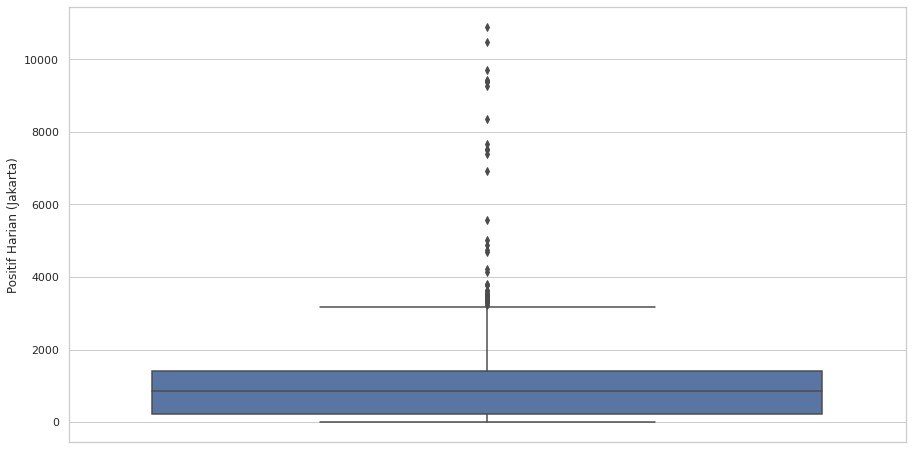

In [386]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=positive_case )

In [387]:
Q1 = np.percentile(positive_case, 25, interpolation = 'midpoint')
Q2 = np.percentile(positive_case, 50, interpolation = 'midpoint')
Q3 = np.percentile(positive_case, 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q2 50 percentile of the given data is, ', Q2)
print('Q3 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)


Q1 25 percentile of the given data is,  209.5
Q2 50 percentile of the given data is,  864.5
Q3 75 percentile of the given data is,  1404.5
Interquartile range is 1195.0


4. Dari dataset yang disediakan, usulkan dua buah variabel dan berikan
analisis korelasi antara kedua variabel tersebut. Jelaskan apa kesimpulan
yang dapat diambil berdasarkan analisis kalian.

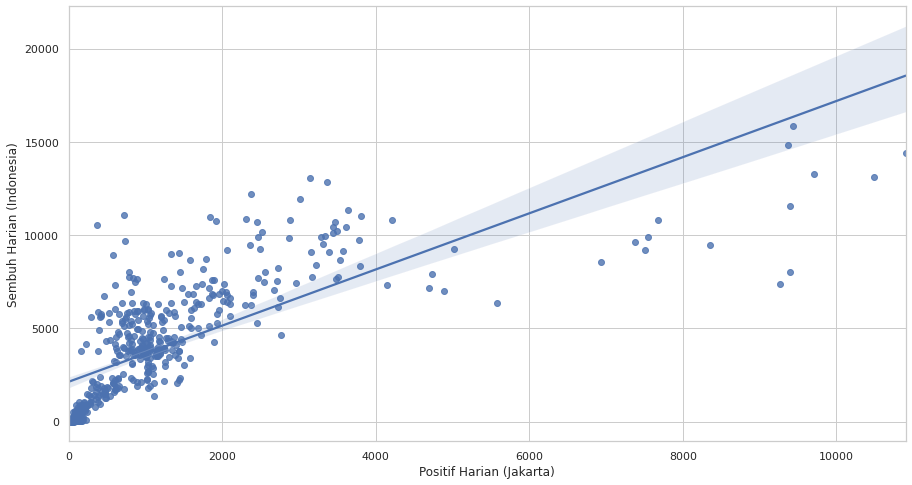

In [388]:
sns.regplot(x="Positif Harian (Jakarta)", y="Sembuh Harian (Indonesia)", data=read_df);

Analisa Tambahan
1. Pas PPKM Micro di Jakarta apakah ada penurunan kasus ?

Cari tahu Tanggal Paling awal, dan akhir pada dataset

In [389]:
df = read_df['Tanggal']
print("Terdapat 494 data, pada kolom dare")
print("Tanggal Paling awal adalah: ", df[0])
print("Tanggal Paling akhir adalah: ", df[493])

Terdapat 494 data, pada kolom dare
Tanggal Paling awal adalah:  2020-03-01 00:00:00
Tanggal Paling akhir adalah:  2021-07-07 00:00:00


Pada Berita yang didapat dari tautan sebagai berikut : https://www.cnnindonesia.com/nasional/20210623195932-20-658518/aturan-lengkap-ppkm-mikro-anies-di-jakarta-hingga-5-juli

Jakarta melakukan PPKM Mikro dari 22 Juni - 5 Juli

Cek kasus positif dari 22 Juni - 5 Juli

In [390]:
positive_case = read_df.loc[:, ['Tanggal', 'Positif Harian (Jakarta)']]
positive_case.tail()

,Tanggal,Positif Harian (Jakarta)
489,2021-07-03,9702
490,2021-07-04,10485
491,2021-07-05,10903
492,2021-07-06,9439
493,2021-07-07,9366


Trend Grafik Positif Harian di Jakarta

In [391]:
start_date = "2021-06-22"
end_date = "2021-07-5"
ppkm_mikro = (positive_case['Tanggal'] >= start_date) & (positive_case['Tanggal'] <= end_date)

In [392]:
positive_case_ppkm = positive_case.loc[ppkm_mikro]
positive_case_ppkm.head()


,Tanggal,Positif Harian (Jakarta)
478,2021-06-22,3221
479,2021-06-23,4693
480,2021-06-24,7505
481,2021-06-25,6934
482,2021-06-26,9271


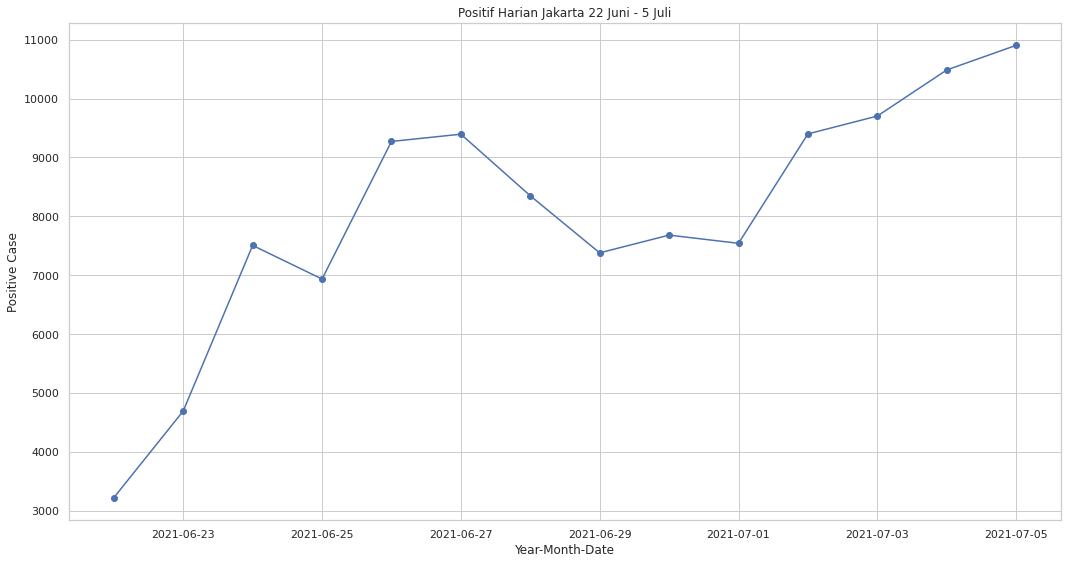

In [393]:
date = positive_case_ppkm['Tanggal']
kasus_positif = positive_case_ppkm['Positif Harian (Jakarta)']
plt.title("Positif Harian Jakarta 22 Juni - 5 Juli")
plt.xlabel("Year-Month-Date")
plt.ylabel("Positive Case")
plt.plot_date(date, kasus_positif, linestyle='solid',xdate=True, ydate=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (15,8)

In [394]:
Indonesia_Positive_PPKM = read_df.loc[:, ['Tanggal', 'Positif Harian (Indonesia)']]
Indonesia_Positive_PPKM.tail()

,Tanggal,Positif Harian (Indonesia)
489,2021-07-03,27913
490,2021-07-04,27233
491,2021-07-05,29745
492,2021-07-06,31189
493,2021-07-07,34379


In [395]:
start_date2 = "2021-06-22"
end_date2 = "2021-07-5"
Maret_April2 = (Indonesia_Positive_PPKM['Tanggal'] >= start_date2) & (Indonesia_Positive_PPKM['Tanggal'] <= end_date2)

In [396]:
Indonesia_Positive_PPKM = Indonesia_Positive_PPKM.loc[Maret_April2]
Indonesia_Positive_PPKM.head()

,Tanggal,Positif Harian (Indonesia)
478,2021-06-22,13668
479,2021-06-23,15308
480,2021-06-24,20574
481,2021-06-25,18872
482,2021-06-26,21095


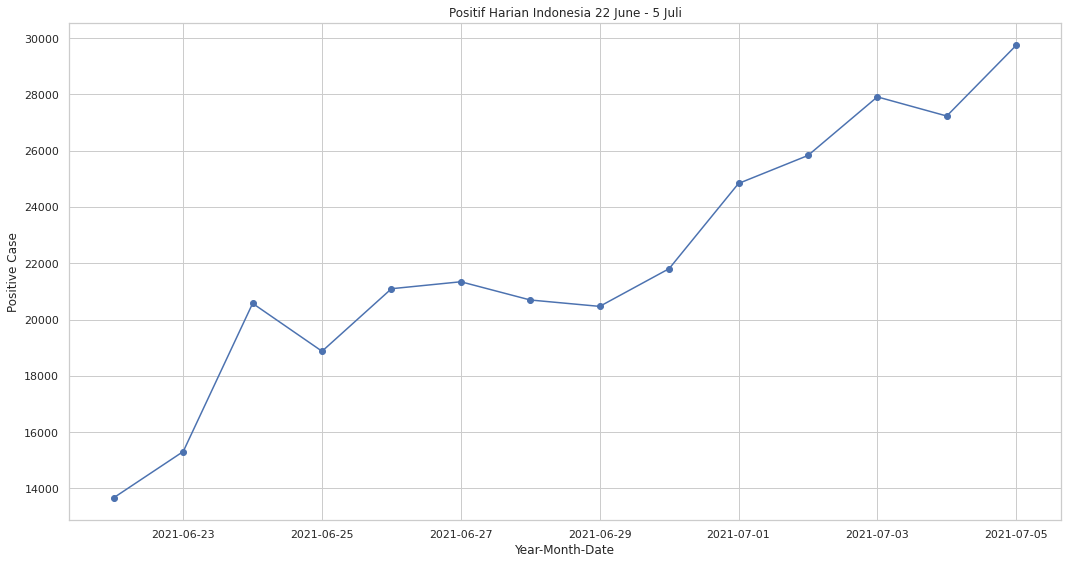

In [416]:
date2 = Indonesia_Positive_PPKM['Tanggal']
kasus_positif2 = Indonesia_Positive_PPKM['Positif Harian (Indonesia)']
plt.title("Positif Harian Indonesia 22 June - 5 Juli")
plt.xlabel("Year-Month-Date")
plt.ylabel("Positive Case")
ax1 = plt.plot_date(date2, kasus_positif2, linestyle='solid',xdate=True, ydate=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (15,8)

In [398]:
Total_Jakarta2 = positive_case_ppkm.sum(numeric_only=True, axis=0)
Total_Indonesia2 = Indonesia_Positive_PPKM.sum(numeric_only=True, axis=0)

In [399]:
print("Total_Indonesia: ", Total_Indonesia2)
print("Total_Jakarta: ", Total_Jakarta2)

Total_Indonesia:  Positif Harian (Indonesia)    309384
dtype: int64
Total_Jakarta:  Positif Harian (Jakarta)    112455
dtype: int64


In [400]:
new_df = pd.DataFrame({'Case':['Total_Indonesia', 'Total_Jakarta'], 'Number Case':[ 309384,  112455]})

In [401]:
new_df.head()

,Case,Number Case
0,Total_Indonesia,309384
1,Total_Jakarta,112455


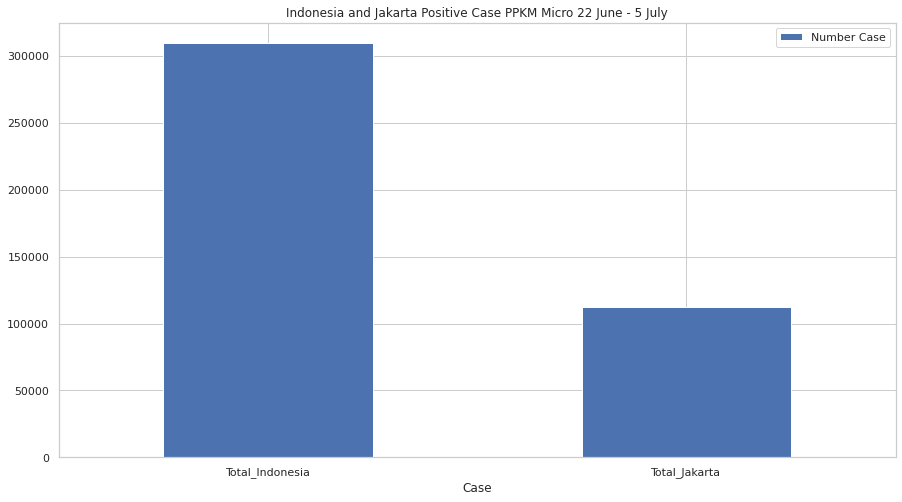

In [402]:
ax = new_df.plot(x='Case', y='Number Case', rot = 0, kind = 'bar', title = 'Indonesia and Jakarta Positive Case PPKM Micro 22 June - 5 July')

Kasus Positif Indonesia vs Jakarta, pas bulan sebelum PPKM Mikro 
[22 Maret - 5 April] (13 Hari)

In [403]:
Indonesia_Positive = read_df.loc[:, ['Tanggal', 'Positif Harian (Indonesia)']]
Indonesia_Positive.tail()

,Tanggal,Positif Harian (Indonesia)
489,2021-07-03,27913
490,2021-07-04,27233
491,2021-07-05,29745
492,2021-07-06,31189
493,2021-07-07,34379


In [404]:
start_date2 = "2021-03-22"
end_date2 = "2021-04-5"
Maret_April = (Indonesia_Positive['Tanggal'] >= start_date2) & (Indonesia_Positive['Tanggal'] <= end_date2)


In [405]:
Indonesia_Positive_MaretApril = Indonesia_Positive.loc[Maret_April ]
Indonesia_Positive_MaretApril.head()

,Tanggal,Positif Harian (Indonesia)
386,2021-03-22,5744
387,2021-03-23,5297
388,2021-03-24,5227
389,2021-03-25,6107
390,2021-03-26,4982


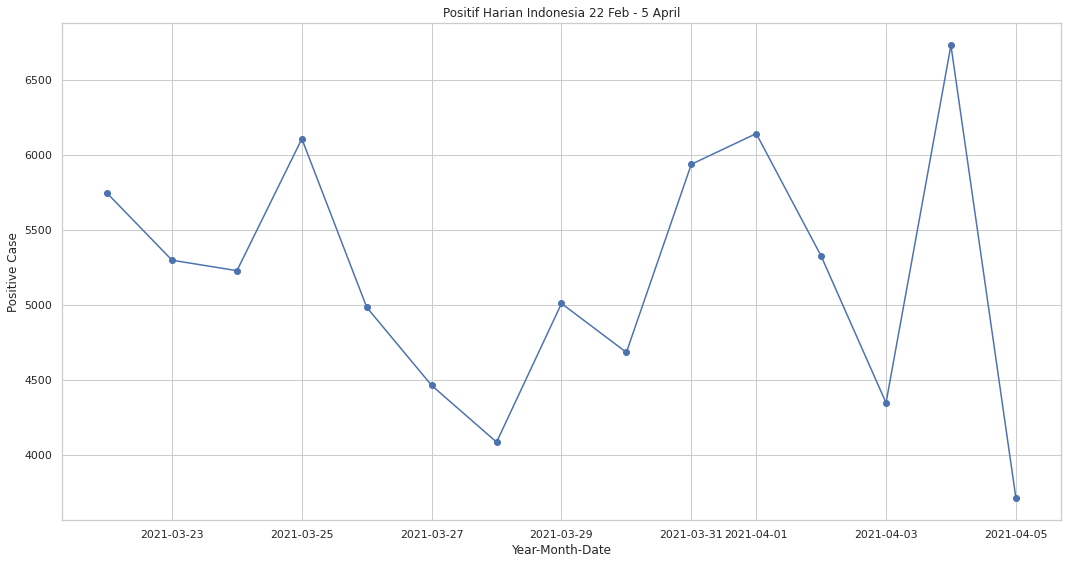

In [406]:
date2 = Indonesia_Positive_MaretApril['Tanggal']
kasus_positif2 = Indonesia_Positive_MaretApril['Positif Harian (Indonesia)']
plt.title("Positif Harian Indonesia 22 Feb - 5 April")
plt.xlabel("Year-Month-Date")
plt.ylabel("Positive Case")
ax1 = plt.plot_date(date2, kasus_positif2, linestyle='solid',xdate=True, ydate=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (15,8)

In [407]:
Jakarta_Positive2 = read_df.loc[:, ['Tanggal', 'Positif Harian (Jakarta)']]
Jakarta_Positive2.tail()

,Tanggal,Positif Harian (Jakarta)
489,2021-07-03,9702
490,2021-07-04,10485
491,2021-07-05,10903
492,2021-07-06,9439
493,2021-07-07,9366


In [408]:
start_date2 = "2021-03-22"
end_date2 = "2021-04-5"
Maret_April2 = (Jakarta_Positive2['Tanggal'] >= start_date2) & (Jakarta_Positive2['Tanggal'] <= end_date2)

In [409]:
Jakarta_Positive_MaretApril = Jakarta_Positive2.loc[Maret_April2]
Jakarta_Positive_MaretApril.head()

,Tanggal,Positif Harian (Jakarta)
386,2021-03-22,1474
387,2021-03-23,815
388,2021-03-24,890
389,2021-03-25,1726
390,2021-03-26,1381


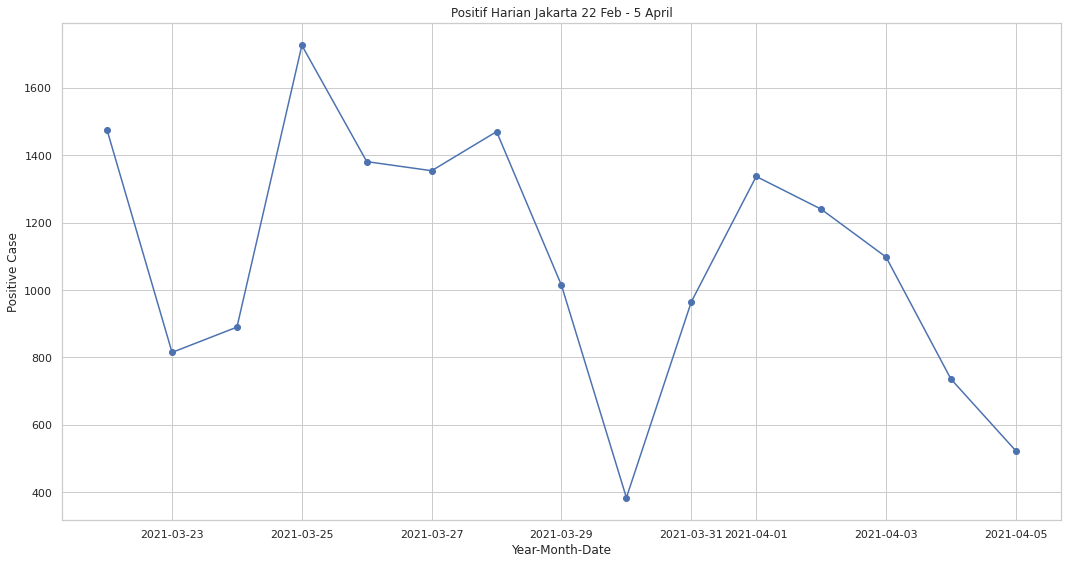

In [410]:
date2 = Jakarta_Positive_MaretApril['Tanggal']
kasus_positif2 = Jakarta_Positive_MaretApril['Positif Harian (Jakarta)']
plt.title("Positif Harian Jakarta 22 Feb - 5 April")
plt.xlabel("Year-Month-Date")
plt.ylabel("Positive Case")
ax2 = plt.plot_date(date2, kasus_positif2, linestyle='solid',xdate=True, ydate=False)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (15,8)

Bar Chart Kasus Positif Indonesia + Jakarta (Maret - April)

In [411]:
Total_Indonesia = Indonesia_Positive_MaretApril.sum(numeric_only=True, axis=0)
Total_Jakarta = Jakarta_Positive_MaretApril.sum(numeric_only=True, axis=0)

In [412]:
print("Total_Indonesia: ", Total_Indonesia)
print("Total_Jakarta: ", Total_Jakarta)

Total_Indonesia:  Positif Harian (Indonesia)    77783
dtype: int64
Total_Jakarta:  Positif Harian (Jakarta)    16407
dtype: int64


In [413]:
new_df = pd.DataFrame({'Case':['Total_Indonesia', 'Total_Jakarta'], 'Number Case':[77783, 16407]})

In [414]:
new_df.head()

,Case,Number Case
0,Total_Indonesia,77783
1,Total_Jakarta,16407


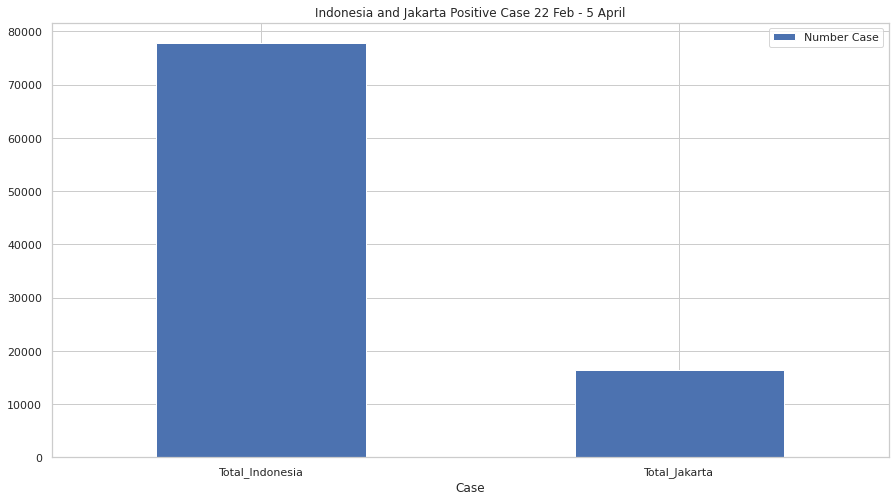

In [415]:

ax = new_df.plot(x='Case', y='Number Case', rot = 0, kind = 'bar', title = 'Indonesia and Jakarta Positive Case 22 Feb - 5 April')
